<a href="https://colab.research.google.com/github/Ljmarcer/Smote_Variants/blob/main/Data_Analysis_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Setup

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


# First Dataset : Students performance in exams,a simple analysis with pandas

In [21]:
!kaggle datasets download -d spscientist/students-performance-in-exams

students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
!unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
replace StudentsPerformance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [23]:
import pandas as pd 
import numpy as np
import math

df_excel = pd.read_csv('StudentsPerformance.csv')

In [24]:
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
# first look
df_excel.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
# calculate specific columns

df_excel['math score'].sum()
df_excel['math score'].mean()
df_excel['math score'].max()
df_excel['math score'].min()
df_excel['math score'].count()

1000

In [27]:
df_excel['average'] = (df_excel['math score'] + df_excel['reading score'] + df_excel['writing score'])/3
# df_excel.mean(axis=1)
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [28]:
# count
df_excel['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [29]:
# if condition
df_excel['pass/fail'] = np.where(df_excel['average'] > 70, 'Pass', 'Fail')
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass


In [30]:
# multiple conditions
conditions = [
    (df_excel['average']>=90),
    (df_excel['average']>=80) & (df_excel['average']<90),
    (df_excel['average']>=70) & (df_excel['average']<80),
    (df_excel['average']>=60) & (df_excel['average']<70),
    (df_excel['average']>=50) & (df_excel['average']<60),
    (df_excel['average']<50),
]

values = ['A', 'B', 'C', 'D', 'E', 'F']

In [31]:
df_excel['grades'] = np.select(conditions, values)
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C


In [32]:
# show first 5 rows
df_excel[['average', 'pass/fail', 'grades']].head()

,average,pass/fail,grades
0,72.666667,Pass,C
1,82.333333,Pass,B
2,92.666667,Pass,A
3,49.333333,Fail,F
4,76.333333,Pass,C


In [33]:
# only sum scores for the female gender
df_female = df_excel[df_excel['gender'] == 'female']
# df_female['sum'] = df_female.sum(axis=1)

In [34]:
# solo obtener el promedio para el genero femenino y grupo B
df_sumifs = df_excel[(df_excel['gender'] == 'female') & (df_excel['race/ethnicity'] == 'group B')]
df_sumifs = df_sumifs.assign(sumifs = df_sumifs['math score'] + df_sumifs['reading score'] + df_sumifs['writing score'])
df_sumifs

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades,sumifs
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C,218
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A,278
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass,C,232
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass,A,275
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,Fail,F,148
...,...,...,...,...,...,...,...,...,...,...,...,...
923,female,group B,associate's degree,free/reduced,none,54,65,65,61.333333,Fail,D,184
944,female,group B,high school,standard,none,58,68,61,62.333333,Fail,D,187
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,Pass,C,239
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,Fail,F,55


In [35]:
# df_excel['gender'].str.title()
# df_excel['gender'].str.upper()
df_excel['gender'].str.title()

0      Female
1      Female
2      Female
3        Male
4        Male
        ...  
995    Female
996      Male
997    Female
998    Female
999    Female
Name: gender, Length: 1000, dtype: object

In [36]:
df_excel['race/ethnicity'].str.extract(r'([A-Z])')


,0
0,B
1,C
2,B
3,A
4,C
...,...
995,E
996,C
997,C
998,D


In [37]:
# there's no empty rows in the dataframe
df_excel[df_excel['gender'].isnull()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades


In [38]:
df_pivot = df_excel.pivot_table(index='race/ethnicity', values=['math score', 'writing score'], aggfunc='mean')
df_pivot

,math score,writing score
race/ethnicity,,
group A,61.629213,62.674157
group B,63.452632,65.600000
group C,64.463950,67.827586
group D,67.362595,70.145038
group E,73.821429,71.407143


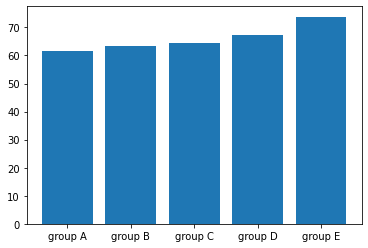

In [39]:
import matplotlib.pyplot as plt

df_plot = df_pivot.reset_index()
plt.bar(df_plot['race/ethnicity'], df_plot['math score'])
plt.show()

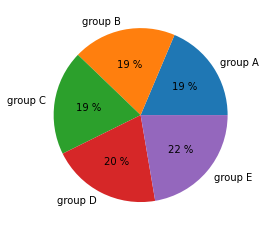

In [40]:
plt.pie(df_plot['math score'], labels=df_plot['race/ethnicity'], autopct='%.0f %%')
plt.show()

# Second Dataset , Data Cleaning

In [41]:
!kaggle datasets download -d shivamb/netflix-shows

netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
!unzip netflix-shows.zip

Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [43]:
df_netflix_2019 = pd.read_csv('netflix_titles.csv')

In [44]:
df_netflix_2019.isnull().sum().sort_values(ascending=False)


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [45]:
df_netflix_2019.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [46]:
df_netflix_2019.shape


(8807, 12)

## Identifying Missing Data


In [47]:
# number of rows missing in each column
# df_netflix_2019.isnull().sum()
# % of rows missing in each column
for column in df_netflix_2019.columns:
    percentage = df_netflix_2019[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


## Dealing with missing data

In [48]:
#1. drop
#drop column
df_netflix_2019.drop('director', axis=1)
#drop row
no_director = df_netflix_2019[df_netflix_2019['director'].isnull()].index
df_netflix_2019.drop(no_director, axis=0)
#~ + .isnull()
df_netflix_2019[~df_netflix_2019['director'].isnull()]
#dropna()
df_netflix_2019.dropna(subset=['director'])

#2. use median, mean (numeric data) or mode (categorical data)
df_netflix_2019[df_netflix_2019['rating'].isnull()]
mode = ''.join(df_netflix_2019['rating'].mode())
df_netflix_2019['rating'].fillna(mode, inplace=True)
#3. replace with arbitrary number or text
df_netflix_2019['duration'].fillna(0, inplace=True)

# backward, forward ->df.fillna(method='bfill') , df.fillna(method='ffill')

## Finding Outliers


In [49]:
#creating column (extract)
df_movie = df_netflix_2019[df_netflix_2019['type']=='Movie']
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)', expand=False).astype(float))

In [50]:
import math

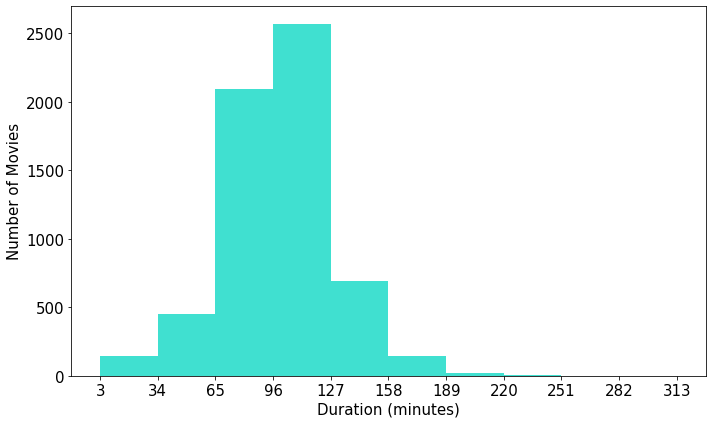

In [51]:
# Histogram
# stylish: lining up  ticks  with the histogram bars
min_minute, max_minute = df_movie['minute'].min(), df_movie['minute'].max()
minbin, maxbin = math.floor(min_minute), math.ceil(max_minute)
gap = maxbin - minbin
#choose number of beens
bins = 10
width = math.ceil(gap/bins)

bins = np.arange(minbin,maxbin+width, width)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(df_movie['minute'], bins=bins, color='turquoise')

fig.set_size_inches(10, 6)
ax.set_xlabel('Duration (minutes)', fontsize=15)
ax.set_ylabel('Number of Movies', fontsize=15)
plt.xticks(bins, fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()
# fig.savefig('histogram_cleaning.png')

#simple
# fig, ax = plt.subplots(nrows=1, ncols=1)
# plt.hist(x=df_movie['minute'])
# fig.tight_layout()

In [52]:
import seaborn as sns

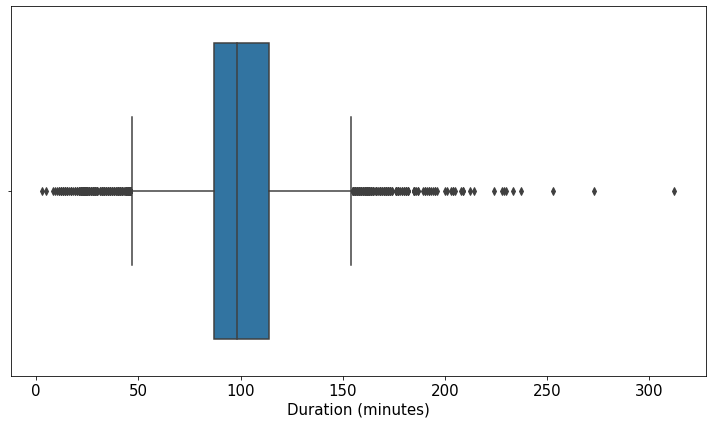

In [53]:
#boxplot
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=df_movie['minute'])
ax.set_xlabel('Duration (minutes)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
fig.savefig('boxplot_cleaning.png')

# fig, ax = plt.subplots(nrows=1, ncols=1)
# ax = sns.boxplot(x=df_movie['minute'])
# fig.tight_layout()

In [54]:
#overview descriptive statitics
df_movie['minute'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

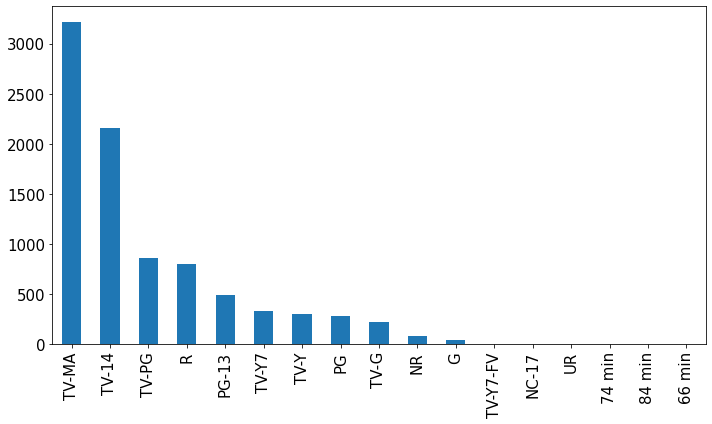

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
fig = df_netflix_2019['rating'].value_counts().plot.bar().get_figure()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
fig.savefig('bar_cleaning')

## Dealing with outliers

In [56]:
#outliers
df_movie[(df_movie['minute']<43) | (df_movie['minute']>158)]
#filtering outliers out
df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]

In [57]:
import re


In [58]:
#inconsistent capitalization
df_netflix_2019['title'] = df_netflix_2019['title'].apply(lambda x:x.lower())
# Remove strings in columns (sub, replace) remove punctuation
df_netflix_2019['title'] = df_netflix_2019['title'].apply(lambda x:re.sub('[^\w\s]','',x))
#unnecessary data
df_netflix_2019 = df_netflix_2019.drop_duplicates()
#droping tiltes from the same type (movie or tv) to avoid further problems (34 out)
df_netflix_2019.drop_duplicates(['title','type'], keep='last', inplace=True)

In [59]:
df_netflix_2019.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,blood water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
